#DATASET

In [2]:
import pandas as pd
import numpy as np
import random

df=pd.read_csv('/content/drive/Shareddrives/FINALS DATASETS/transportation_dataset.csv')
df.head()

,Station Names,Number of Passengers,Number of Trains,Waiting Time (minutes),Fare Price ($)
0,Central Station,148,1,20,8.48
1,Bayfront,221,8,16,4.29
2,Hilltop,409,1,23,11.40
3,Northgate,263,1,26,15.86
4,Main Street,84,2,27,5.88


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#MODELLING

##RANDOM FOREST REGRESSION

Mean Squared Error: 37.295569715499994
R2 Score: -0.18102500433516133


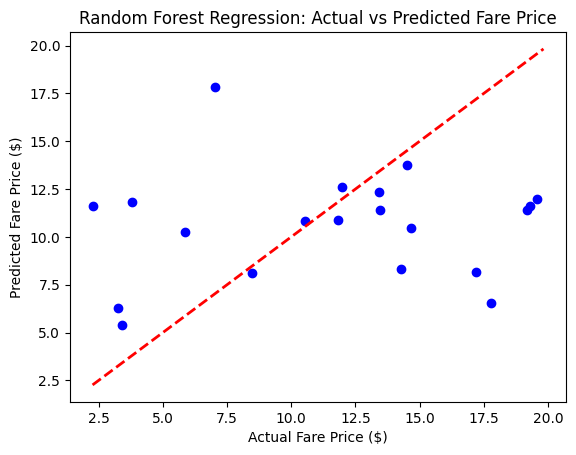

In [3]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Features and target variable
X = df[["Number of Passengers", "Number of Trains", "Waiting Time (minutes)"]]
y = df["Fare Price ($)"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Calculating the Mean Squared Error and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Fare Price ($)')
plt.ylabel('Predicted Fare Price ($)')
plt.title('Random Forest Regression: Actual vs Predicted Fare Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.show()

Mean Squared Error: 37.63435272000001
R-squared: -0.19175312036638048


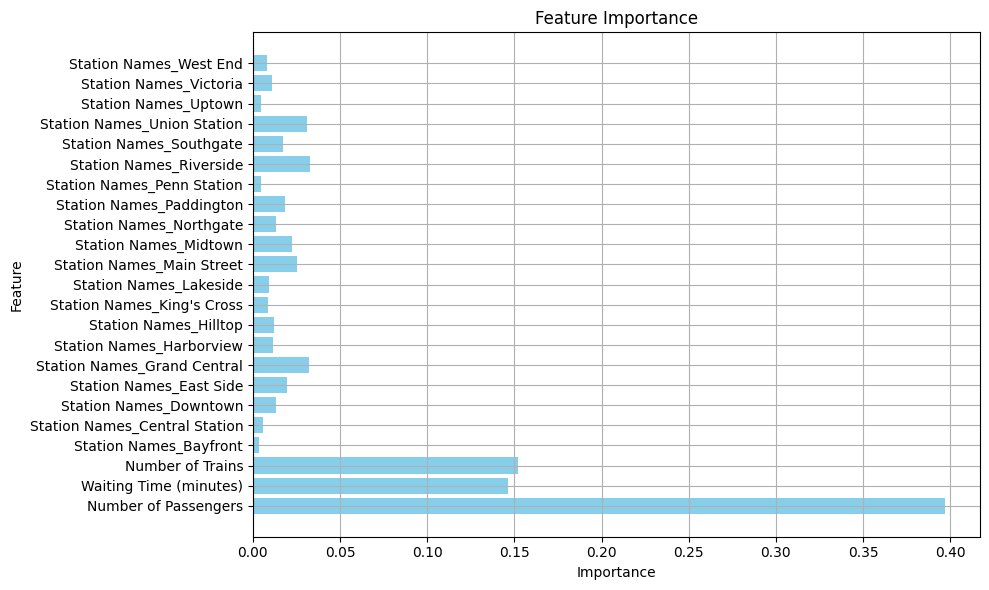

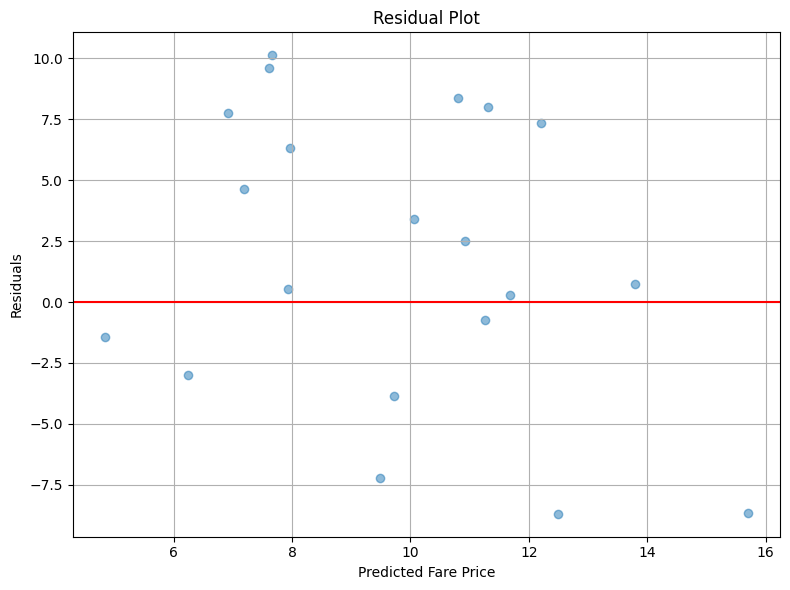

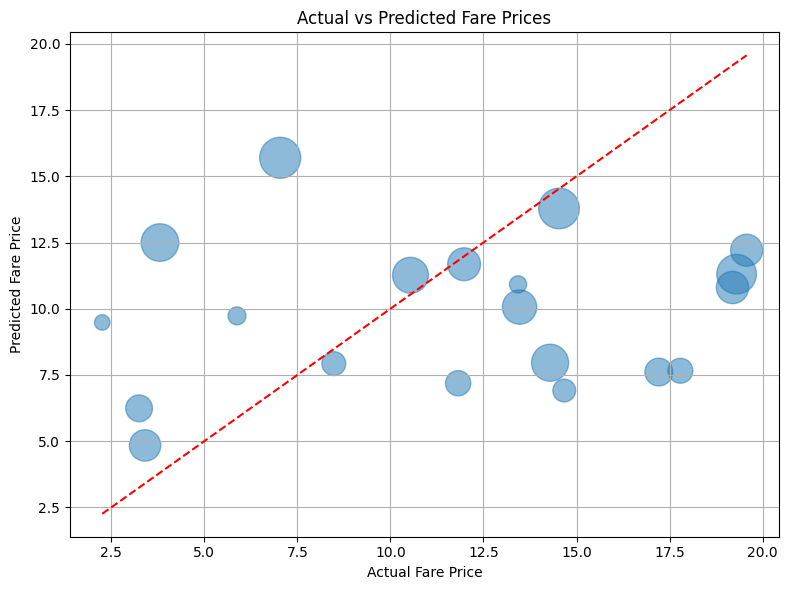

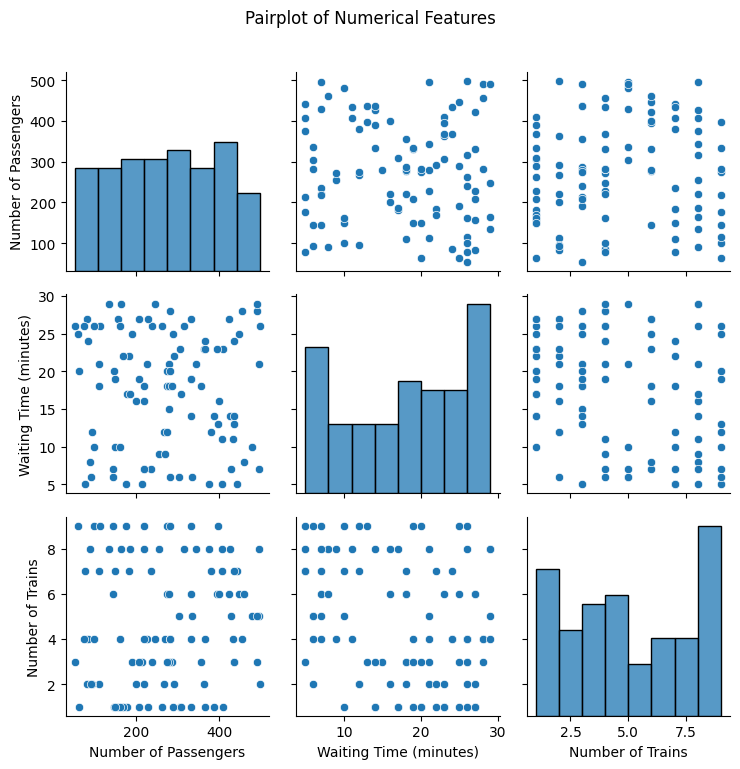

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Step 1: Load the dataset
file_path = '/content/drive/Shareddrives/FINALS DATASETS/transportation_dataset.csv'
df = pd.read_csv(file_path)

# Step 2: Prepare data
X = df.drop('Fare Price ($)', axis=1)  # Features
y = df['Fare Price ($)']  # Target variable

# Step 3: Split categorical and numerical features
categorical_cols = ['Station Names']
numerical_cols = list(set(X.columns) - set(categorical_cols))

# Step 4: Preprocessing - One-hot encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Build the random forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Step 7: Create and fit the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', rf_regressor)])

pipeline.fit(X_train, y_train)

# Step 8: Predict on test data and evaluate the model
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 9: Plot Feature Importance
feature_names = numerical_cols + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols))
importances = pipeline.named_steps['regressor'].feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Fare Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 11: Actual vs Predicted Scatter Plot with Size
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s=X_test['Number of Passengers']*2, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Fare Price')
plt.ylabel('Predicted Fare Price')
plt.title('Actual vs Predicted Fare Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 12: Pairplot for Key Numerical Features
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()